# Aprendizado Não-Supervisionado

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Análise de Componentes Principais (PCA)

In [2]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[(-3, 3.1),
 Text(0, 0.5, 'Componente 2'),
 (-5, 5),
 Text(0.5, 0, 'Componente 1'),
 Text(0.5, 1.0, 'Após PCA')]

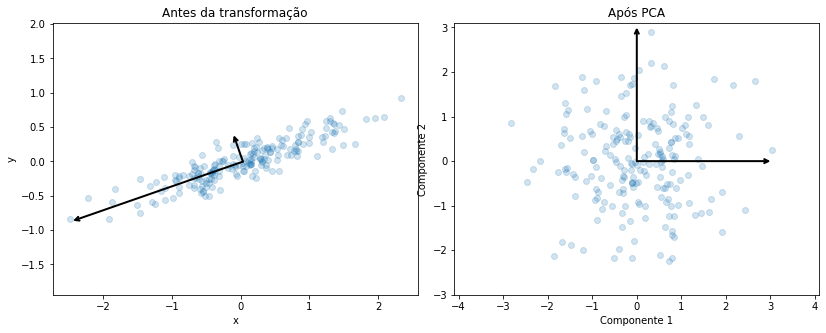

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='Antes da transformação')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='Componente 1', ylabel='Componente 2',
          title='Após PCA',
          xlim=(-5, 5), ylim=(-3, 3.1))

In [4]:
iris = datasets.load_iris()
X, y, target_names = iris["data"], iris["target"], iris['target_names']

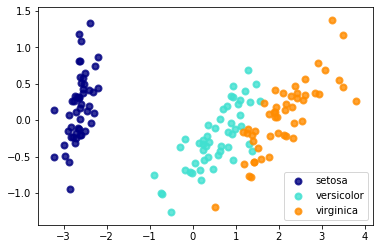

In [5]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
pd.DataFrame(data=X2D).head(8)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
target_names=iris['target_names']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X2D[y == i, 0], X2D[y == i, 1], color=color, 
                alpha=.8, lw=lw,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

## Clusterização

In [6]:
iris = datasets.load_iris()
X, y, target_names = iris["data"], iris["target"], iris['target_names']

clu = GaussianMixture(n_components=3, random_state=42).fit(X)
y_pred = clu.predict(X)

In [7]:
def plot_gm(X_,y_, s=30):
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange', 'red', 'magenta', 'darkgreen']
    for i in np.unique(y_pred):
        plt.scatter(X_[y_ == i, 0], X_[y_ == i, 1], color=colors[i], 
                    alpha=.8,label='cluster '+str(i), s=s)
    plt.legend(loc='best', shadow=False, scatterpoints=10)
    plt.show()
    
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
        
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    D, y_new =  clusterer.sample(10000); 
    pca=PCA(n_components=2); 
    pca.fit(X); 
    D2D=pca.transform(D);
    
    mins = D2D.min(axis=0) #- 0.1
    maxs = D2D.max(axis=0) #+ 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    aux=np.c_[xx.ravel(), yy.ravel()]
    D_inv = pca.inverse_transform(aux)
    Z = -clusterer.score_samples(D_inv)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 #norm=LogNorm(vmin=1.0, vmax=60.0),
                 levels=np.logspace(0, 2, 12)
                )
    plt.contour(xx, yy, Z,
                #norm=LogNorm(vmin=1.0, vmax=60.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(D_inv)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(D2D[:, 0], D2D[:, 1], 'y.', markersize=2)
    plot_centroids(pca.transform(clusterer.means_), clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

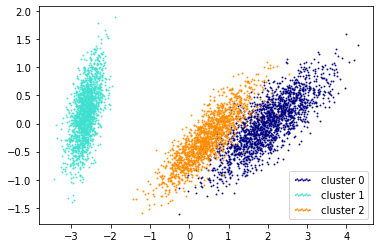

In [8]:
D, y_new =  clu.sample(5000)
D2D=pca.transform(D)
plot_gm(D2D,y_new, s=1)

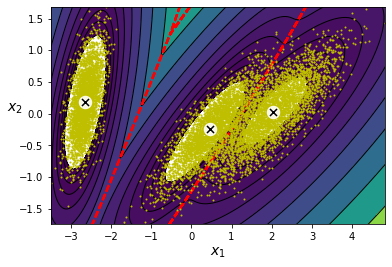

In [9]:
plot_gaussian_mixture(clu, X)

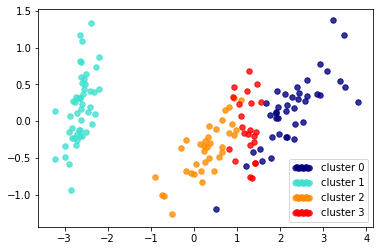

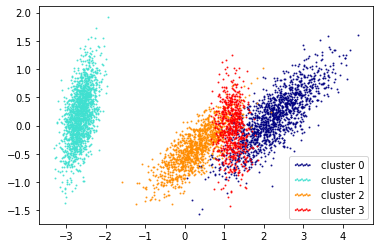

In [10]:
clu = GaussianMixture(n_components=4, random_state=42).fit(X)
y_pred = clu.predict(X)
D, y_new =  clu.sample(5000)
D2D=pca.transform(D)
plot_gm(X2D, y_pred, s=30)
plot_gm(D2D,  y_new, s=1)

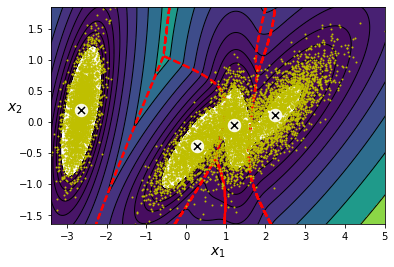

In [11]:
plot_gaussian_mixture(clu, X)